In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv
/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/349_IM-1697-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/607_IM-2196-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2832_IM-1249-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/699_IM-2263-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1931_IM-0602-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/947_IM-2442-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2932_IM-1335-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2303_IM-0882-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/291_IM-1313-2001.dcm.png
/kaggle

In [2]:
print("Hello")

Hello


# Initial Ground Up

In [3]:
import pandas as pd
image_projections = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")

In [4]:
image_projections.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [5]:
reports_dataset = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")

In [6]:
reports_dataset.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [7]:
image_dir =('/kaggle/input/chest-xrays-indiana-university/images/images_normalized')

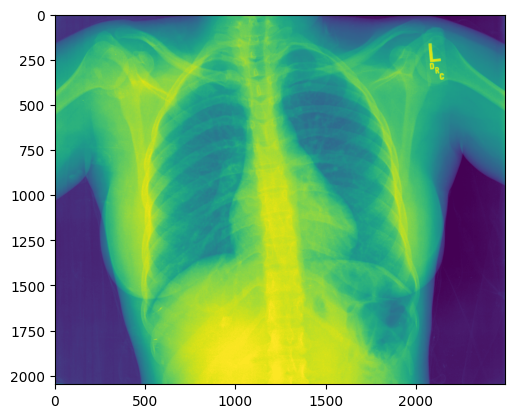

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png"
img = Image.open(image_path)

plt.imshow(img)
# plt.axis('off')
# plt.title('Image')
plt.show()

In [9]:
print(image_projections.columns)
print(reports_dataset.columns)

Index(['uid', 'filename', 'projection'], dtype='object')
Index(['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison',
       'findings', 'impression'],
      dtype='object')


In [10]:
image_report_merge = pd.merge(image_projections, reports_dataset, on='uid')


In [11]:
image_report_merge.to_csv('image_report_pairs.csv', index=False)
image_report_merge.head()

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,2,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
4,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."


In [12]:
image_report_merge.head()

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,2,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
4,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."


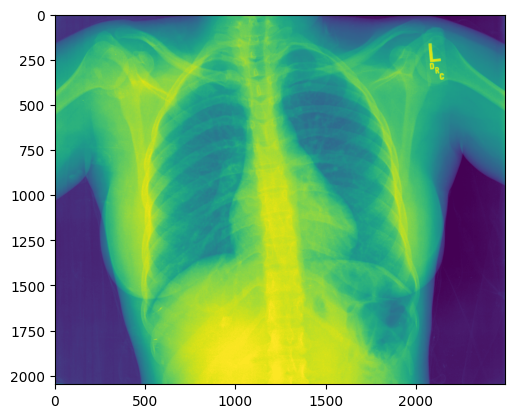

Impression:
 Normal chest x-XXXX.

 Findings:
 The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.


In [13]:

# Set your image folder path
image_folder = image_dir 

# Choose a specific image file (from filename column)
img_file = '1_IM-0001-4001.dcm.png'  # 🔁 change this to test another image

# Filter the row from merged dataframe

row = image_report_merge[image_report_merge['filename']== img_file]

# Check if it exists
# if not row.empty:
#     # Load image
#     img_path = os.path.join(image_folder, img_file)
#     img = Image.open(img_path).convert("L")  # Grayscale

#     # Show image
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     plt.title(img_file)
#     plt.show()

#     # Show impression and findings
#     print("📝 Impression:\n", row['impression'].values[0])
#     print("\n🔍 Findings:\n", row['findings'].values[0])

# else:
#     print("Image not found in the merged dataframe.")


if not row.empty:
    img_path = os.path.join(image_folder, img_file)
    img = Image.open(img_path)

    plt.imshow(img)
    plt.show()

    print('Impression:\n', row['impression'].values[0])
    print('\n Findings:\n', row['findings'].values[0])

else:
    print('Image not Found in the merged dataframe')

In [14]:
image_dir

'/kaggle/input/chest-xrays-indiana-university/images/images_normalized'

In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def show_image_report(image_df, image_folder, img_filename):
    row = image_df[image_df['filename'] == img_filename]
    if row.empty:
        print(f"Image {img_filename} not found in DataFrame.")
        return
    
    img_path = os.path.join(image_folder, img_filename)
    if not os.path.exists(img_path):
        print(f" File {img_path} does not exist.")
        return
    
    # Show image
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
    plt.axis('off')
    plt.title(img_filename)
    plt.show()
    
    # Show report
    print("📝 Impression:\n", row['impression'].values[0])
    print("\n🔍 Findings:\n", row['findings'].values[0])

# Usage


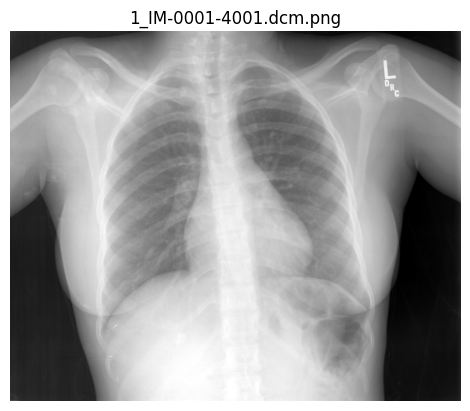

📝 Impression:
 Normal chest x-XXXX.

🔍 Findings:
 The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.


In [16]:
show_image_report(image_report_merge, image_dir, '1_IM-0001-4001.dcm.png')


# Clean + Prepare Data



In [17]:
from sklearn.model_selection import train_test_split

# Step 1: Remove rows with missing impressions
df = image_report_merge.dropna(subset=['impression']).reset_index(drop=True)
df['impression'] = df['impression'].str.strip()

# Step 2: (Optional) Use a smaller sample for quick experiments
df_small = df.sample(500, random_state=42).reset_index(drop=True)

# Step 3: Split into train, val, test
train_df, temp_df = train_test_split(df_small, test_size=0.2, random_state=42)   # 80% train, 20% temp
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)     # 10% val, 10% test

print(f"Train size: {len(train_df)}")
print(f"Val size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 400
Val size: 50
Test size: 50


In [18]:
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df_small, test_size=0.1, random_state=42)



#  BLIP fine-tuning (captioning)

In [19]:
import math
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm.auto import tqdm
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")


2025-09-05 18:57:58.293670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757098678.478799      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757098678.540985      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [20]:
val_df.head()

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression
76,1655,1655_IM-0431-1001.dcm.png,Frontal,normal,normal,2 views chest XXXX,"Knee pain, preop XXXX",XXXX,PA and lateral views of the chest were obtaine...,1. No acute cardiopulmonary disease.
155,974,974_IM-2463-3001.dcm.png,Lateral,Pulmonary Congestion/mild;Spine/degenerative,Pulmonary Congestion;Spine,"PA AND LATERAL VIEWS OF THE CHEST dated XXXX, ...",XXXX cell crisis,"PA and lateral chest dated XXXX, XXXX",Stable cardiomediastinal silhouette. Mild cong...,1. Stable chest with no acute cardiopulmonary ...
30,869,869_IM-2389-2001.dcm.png,Frontal,normal,normal,"PA and Lateral Chest Radiograph XXXX, XXXX at ...",XXXX-year-old female with chest tightness,NaN,The heart is normal size. The mediastinum is u...,No acute cardiopulmonary abnormality.
209,1537,1537_IM-0348-1002.dcm.png,Lateral,normal,normal,PA and lateral chest x-XXXX XXXX.,"XXXX-year-old male, history of positive PPD, c...",None.,The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process. No evidence ...
68,841,841_IM-2365-1001.dcm.png,Frontal,"Catheters, Indwelling/left;Lung/hyperdistentio...","Catheters, Indwelling;Lung;Deformity",Xray Chest PA and Lateral,PICC LINE POSITION;,NaN,The heart is normal in size. The mediastinum i...,No acute disease. Left upper extremity PIC cat...


In [21]:
# --- Environment (set before importing torch for best effect) ---
import os
os.environ.setdefault("PYTORCH_CUDA_ALLOC_CONF", "expandable_segments:True")
# =========================
# User inputs / placeholders
# =========================
# Provide these from your notebook/session:
# train_df: pandas DataFrame with columns ['filename', 'findings']
# val_df:   pandas DataFrame with columns ['filename', 'findings']
# image_folder: directory containing images referenced by 'filename'
# Example:
# image_folder = "/kaggle/input/your-images"
# (Assumes train_df/val_df already exist.)

# -------------------------
# Common training parameters
# -------------------------
MODEL_NAME = "Salesforce/blip-image-captioning-base"  # use base for lower VRAM
OUTPUT_DIR = "/kaggle/working/fine-tuned-blip-medical-report"
MAX_LEN = 64              # cap text length (critical for memory)
BATCH_SIZE = 2            # reduce if you still OOM (try 1)
NUM_EPOCHS = 5
LR = 5e-5
FREEZE_VISION = True      # big memory saver; set False to finetune image encoder
USE_GRAD_CHECKPOINT = True
USE_AMP = True            # mixed precision

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [22]:

# Ensure tokenizer has required special tokens
tok = processor.tokenizer
assert tok.pad_token_id is not None, "Tokenizer missing pad_token_id."
assert tok.cls_token_id is not None, "Tokenizer missing cls/BOS token."
assert tok.sep_token_id is not None, "Tokenizer missing sep/EOS token."

# Memory savers
model.config.use_cache = False  # disable KV cache during training
if USE_GRAD_CHECKPOINT:
    try:
        model.gradient_checkpointing_enable()
    except Exception:
        pass  # Some transformers versions expose it per-submodule only

if FREEZE_VISION:
    for p in model.vision_model.parameters():
        p.requires_grad = False

model = model.to(device)

# Dataset

In [23]:

# ---------------
# Dataset / Collate
# ---------------
class MedicalDataset(Dataset):
    def __init__(self, data_frame, image_folder, processor, max_length=MAX_LEN):
        self.df = data_frame.reset_index(drop=True)
        self.folder = image_folder
        self.processor = processor
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_name = str(row["filename"])
        findings = str(row["findings"])

        img_path = os.path.join(self.folder, img_name)
        if not os.path.exists(img_path):
            # Skip missing files gracefully; DataLoader collate_fn will drop None
            print(f"[WARN] File not found: {img_path}")
            return None

        image = Image.open(img_path).convert("RGB")

        # Use processor to build pixel_values + tokenized text
        enc = self.processor(
            images=image,
            text=findings,
            padding="max_length",      # fixed length for stable shapes
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        # Prepare labels: same as input_ids but pad positions -> -100
        labels = enc["input_ids"].clone()
        pad_id = self.processor.tokenizer.pad_token_id
        labels[labels == pad_id] = -100

        item = {k: v.squeeze(0) for k, v in enc.items()}  # remove batch dim
        item["labels"] = labels.squeeze(0)
        return item


def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if not batch:
        return None
    return torch.utils.data.dataloader.default_collate(batch)



In [24]:
# Datasets & Dataloaders (pin_memory to speed H2D copies)
# train_dataset = MedicalDataset(train_df, image_folder, processor, max_length=MAX_LEN)
# val_dataset = MedicalDataset(val_df, image_folder, processor, max_length=MAX_LEN)

# train_loader = DataLoader(
#     train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn,
#     num_workers=2, pin_memory=True
# )
# val_loader = DataLoader(
#     val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn,
#     num_workers=2, pin_memory=True
# )

In [25]:
train_dataset = MedicalDataset(train_df, image_folder, processor, max_length=MAX_LEN)
val_dataset   = MedicalDataset(val_df, image_folder, processor, max_length=MAX_LEN)
test_dataset  = MedicalDataset(test_df, image_folder, processor, max_length=MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          collate_fn=collate_fn, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False,
                          collate_fn=collate_fn, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=1, shuffle=False,
                          collate_fn=collate_fn, num_workers=2, pin_memory=True)

In [26]:
# --------
# Optimizer
# -----------
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

# Mixed precision scaler
scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)

# -----------
# Train loop
# -----------
best_val_loss = math.inf
os.makedirs(OUTPUT_DIR, exist_ok=True)

for epoch in range(NUM_EPOCHS):
    # ------ Training ------
    model.train()
    total_train_loss = 0.0
    pbar = tqdm(train_loader, desc=f"[Train] Epoch {epoch+1}/{NUM_EPOCHS}")
    for batch in pbar:
        if batch is None:
            continue

        # to device
        batch = {k: v.to(device, non_blocking=True) for k, v in batch.items()}

        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast(enabled=USE_AMP):
            outputs = model(
                pixel_values=batch["pixel_values"],
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                labels=batch["labels"],
            )
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_train_loss += loss.item()
        pbar.set_postfix({"loss": f"{loss.item():.4f}"})

    avg_train_loss = total_train_loss / max(1, len(train_loader))
    print(f"Epoch {epoch+1} - Training Loss: {avg_train_loss:.4f}")

    # ------ Validation ------
    model.eval()
    total_val_loss = 0.0
    with torch.no_grad():
        pbar = tqdm(val_loader, desc=f"[Valid] Epoch {epoch+1}/{NUM_EPOCHS}")
        for batch in pbar:
            if batch is None:
                continue
            batch = {k: v.to(device, non_blocking=True) for k, v in batch.items()}
            with torch.cuda.amp.autocast(enabled=USE_AMP):
                outputs = model(
                    pixel_values=batch["pixel_values"],
                    input_ids=batch["input_ids"],
                    attention_mask=batch["attention_mask"],
                    labels=batch["labels"],
                )
                loss = outputs.loss
            total_val_loss += loss.item()
            pbar.set_postfix({"val_loss": f"{loss.item():.4f}"})

    avg_val_loss = total_val_loss / max(1, len(val_loader))
    print(f"Epoch {epoch+1} - Validation Loss: {avg_val_loss:.4f}")

    # Save best checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        ckpt_dir = os.path.join(OUTPUT_DIR, "best")
        os.makedirs(ckpt_dir, exist_ok=True)
        model.save_pretrained(ckpt_dir)
        processor.save_pretrained(ckpt_dir)
        print(f"[INFO] Best model updated -> {ckpt_dir}")

    # Optional cleanup between epochs
    del outputs, loss
    torch.cuda.empty_cache()

# ---------------
# Final save (last)
# ---------------
# final_dir = os.path.join(OUTPUT_DIR, "last")
# os.makedirs(final_dir, exist_ok=True)
# model.save_pretrained(final_dir)
# processor.save_pretrained(final_dir)
# print(f"[INFO] Final model and processor saved to: {final_dir}")

# # ---------------
# # Quick sanity: list files (Kaggle-visible)
# # ---------------
# print("Saved files:")
# os.system(f"ls -lh {OUTPUT_DIR} || true")
# os.system(f"ls -lh {OUTPUT_DIR}/best || true")
# os.system(f"ls -lh {OUTPUT_DIR}/last || true")


/tmp/ipykernel_19/3015473861.py:7: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)


[Train] Epoch 1/5:   0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:28: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 1 - Training Loss: 2.7080


[Valid] Epoch 1/5:   0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:56: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


Epoch 1 - Validation Loss: 1.6701
[INFO] Best model updated -> /kaggle/working/fine-tuned-blip-medical-report/best


[Train] Epoch 2/5:   0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:28: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 2 - Training Loss: 1.4821


[Valid] Epoch 2/5:   0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:56: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


Epoch 2 - Validation Loss: 1.4687
[INFO] Best model updated -> /kaggle/working/fine-tuned-blip-medical-report/best


[Train] Epoch 3/5:   0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:28: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 3 - Training Loss: 1.1385


[Valid] Epoch 3/5:   0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:56: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


Epoch 3 - Validation Loss: 1.3560
[INFO] Best model updated -> /kaggle/working/fine-tuned-blip-medical-report/best


[Train] Epoch 4/5:   0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:28: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 4 - Training Loss: 0.8871


[Valid] Epoch 4/5:   0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:56: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


Epoch 4 - Validation Loss: 1.3498
[INFO] Best model updated -> /kaggle/working/fine-tuned-blip-medical-report/best


[Train] Epoch 5/5:   0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:28: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 5 - Training Loss: 0.6953


[Valid] Epoch 5/5:   0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_19/3015473861.py:56: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


Epoch 5 - Validation Loss: 1.3962


# Test Image

/tmp/ipykernel_19/2376850144.py:74: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp, dtype=autocast_dtype):


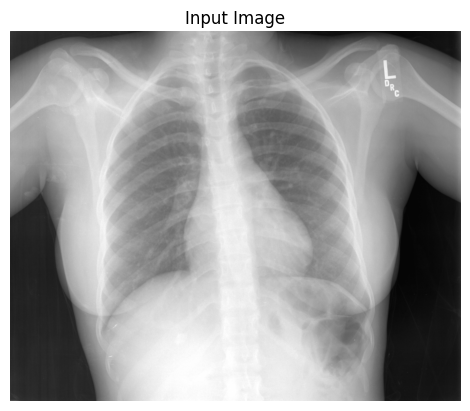

📝 Generated Findings:
 the heart and lungs have xxxx xxxx in the interval. both lungs are clear and expanded. heart and mediastinum normal.


In [27]:
# import os
# import torch
# import matplotlib.pyplot as plt
# from PIL import Image
# from transformers import BlipForConditionalGeneration, BlipProcessor

# # ---------- Config ----------
# # Point to the checkpoint you saved during training
# # Prefer "best" if it exists; else fall back to "last"
BASE_DIR = "/kaggle/working/fine-tuned-blip-medical-report"
CKPT_DIR_BEST = os.path.join(BASE_DIR, "best")
CKPT_DIR_LAST = os.path.join(BASE_DIR, "last")
CKPT_DIR = CKPT_DIR_BEST if os.path.isdir(CKPT_DIR_BEST) else (
    CKPT_DIR_LAST if os.path.isdir(CKPT_DIR_LAST) else BASE_DIR
)

# Path to your test image (CHANGE THIS)
test_image_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png"

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# ---------- Load model/processor ----------
# If you trained with device_map="auto" you can also load with device_map="auto" again.
# For standard loading to a single device:
dtype = torch.bfloat16 if (torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 8) else torch.float16

processor = BlipProcessor.from_pretrained(CKPT_DIR)
model = BlipForConditionalGeneration.from_pretrained(
    CKPT_DIR,
    torch_dtype=dtype,
    low_cpu_mem_usage=True
)

# If you used device_map="auto" during training and still want auto-offload here, use:
# model = BlipForConditionalGeneration.from_pretrained(
#     CKPT_DIR,
#     torch_dtype=dtype,
#     low_cpu_mem_usage=True,
#     device_map="auto",
# )

# Only move if not using device_map="auto"
if not hasattr(model, "hf_device_map"):
    model = model.to(device)

model.eval()
model.config.use_cache = True  # OK for inference

# ---------- Inference function ----------
@torch.no_grad()
def generate_report(image_path, model, processor, device, 
                    max_length=64, num_beams=4, 
                    length_penalty=1.0, repetition_penalty=1.0,
                    do_sample=False, temperature=1.0,
                    show_image=True):
    """
    Generate caption/report for a single image with BLIP.
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")

    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    # Put tensors on the right device (if not using device_map="auto")
    if not hasattr(model, "hf_device_map"):
        inputs = {k: v.to(device) for k, v in inputs.items()}

    # Mixed precision autocast only if we're on CUDA
    use_amp = torch.cuda.is_available()
    autocast_dtype = torch.bfloat16 if (use_amp and torch.cuda.get_device_capability(0)[0] >= 8) else torch.float16

    with torch.cuda.amp.autocast(enabled=use_amp, dtype=autocast_dtype):
        generated_ids = model.generate(
            pixel_values=inputs["pixel_values"],
            max_length=max_length,
            num_beams=num_beams,
            length_penalty=length_penalty,
            repetition_penalty=repetition_penalty,
            do_sample=do_sample,
            temperature=temperature,
            early_stopping=True
        )

    # Prefer tokenizer.decode for clarity
    text = processor.tokenizer.decode(generated_ids[0], skip_special_tokens=True)

    if show_image:
        plt.imshow(image)
        plt.axis("off")
        plt.title("Input Image")
        plt.show()

    print("📝 Generated Findings:\n", text)
    return text

# ---------- Run on your image ----------
if os.path.exists(test_image_path):
    _ = generate_report(
        test_image_path, model, processor, device,
        max_length=64,       # keep consistent with training (e.g., 64)
        num_beams=4,         # beam search for quality
        length_penalty=1.0,  # tune if outputs are too short/long
        repetition_penalty=1.05,  # slight penalty to reduce repetition
        do_sample=False,     # set True + temperature for more diversity
        temperature=1.0,
        show_image=True
    )
else:
    print(f"Test image not found at {test_image_path}. Please set a valid path.")


In [28]:
from tqdm.auto import tqdm

model.eval()
predictions = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Running inference on test set"):
        if batch is None:
            continue
        batch = {k: v.to(device) for k, v in batch.items()}
        
        generated_ids = model.generate(
            pixel_values=batch["pixel_values"],
            max_length=64,
            num_beams=4,
            early_stopping=True
        )
        caption = processor.tokenizer.decode(
            generated_ids[0], skip_special_tokens=True
        )
        predictions.append(caption)

# Attach predictions to test_df
test_df = test_df.copy()
test_df["generated_report"] = predictions

# Save to CSV (Kaggle visible)
out_csv = "/kaggle/working/test_predictions.csv"
test_df.to_csv(out_csv, index=False)
print(f"✅ Predictions saved to {out_csv}")


Running inference on test set:   0%|          | 0/50 [00:00<?, ?it/s]

✅ Predictions saved to /kaggle/working/test_predictions.csv


In [29]:
df = pd.read_csv("/kaggle/working/test_predictions.csv")

In [30]:
df

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression,generated_report
0,3287,3287_IM-1568-3003.dcm.png,Lateral,Density/lung/middle lobe/right/round;Aorta/obs...,Density;Aorta;Density,PA lateral chest x-XXXX XXXX at XXXX p.m.,Abnormal findings of previous studies XXXX in ...,CT chest XXXX,Heart size and mediastinal contour normal. The...,Right midlung and left basilar airspace densit...,the heart is normal in size and contour. the l...
1,2515,2515_IM-1036-1001.dcm.png,Frontal,normal,normal,Frontal and Lateral view of the chest XXXX/XXX...,Hemoptysis,XXXX,The cardiomediastinal silhouette and vasculatu...,1. No acute radiographic cardiopulmonary process.,the heart is normal in size and contour. the l...
2,1930,1930_IM-0602-1001-0001.dcm.png,Lateral,Lung/hypoinflation/mild;Thoracic Vertebrae/deg...,Lung;Thoracic Vertebrae,"PA and lateral views of the chest dated XXXX, ...","Preop, bilateral knee injury.",None.,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings.,the heart is normal in size and contour. the l...
3,1523,1523_IM-0339-2001.dcm.png,Lateral,normal,normal,"PA and lateral views of the chest dated XXXX, ...","XXXX year old, bone marrow XXXX, asymptomatic.",None.,"Heart size, cardiomediastinal silhouette, and ...",No acute cardiopulmonary process.,the heart is normal in size and contour. the l...
4,3589,3589_IM-1767-1001.dcm.png,Frontal,Lung/hypoinflation/mild;Opacity/lung/base/left...,Lung;Opacity,"Chest, 2 views, XXXX XXXX ComparisXXXX/XXXX",Abdominal pain,NaN,Cardiomediastinal contour and pulmonary vascul...,"Streaky left basilar airspace opacities, which...",the heart is normal in size and contour. the l...
5,518,518_IM-2131-2001.dcm.png,Lateral,normal,normal,PA and lateral chest. XXXX.,Shortness of breath.,NaN,"Stable normal cardiac size and contour, unrema...","Stable normal cardiac size and contour, unrema...",the heart is normal in size and contour. the l...
6,421,421_IM-2064-2001.dcm.png,Lateral,normal,normal,"Chest x-XXXX XXXX and lateral, XXXX.",XXXX-year-old female with chest pain,"Chest x-XXXX, XXXX","Lungs are clear without focal consolidation, e...",Negative for acute cardiopulmonary abnormality.,the heart is normal in size and contour. the l...
7,2706,2706_IM-1172-2001.dcm.png,Lateral,Arthritis/spine,Arthritis,"PA and lateral chest XXXX, XXXX.",Preop XXXX for hip surgery.,"XXXX, XXXX.",The lungs are clear. There is no pleural effus...,No active disease.,the heart is normal in size and contour. the l...
8,3959,3959_IM-2023-1001.dcm.png,Frontal,No Indexing,No Indexing,Xray Chest PA and Lateral,XXXX S/P XXXX XXXX. Aortic stenosis,Chest 2 views. XXXX.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,the heart is normal in size and contour. the l...
9,2365,2365_IM-0927-2001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,"History of hepatocellular carcinoma, status po...",NaN,The heart size and pulmonary vascularity appea...,No evidence of active disease.,the heart is normal in size and contour. the l...


# Trying again Fresh 

In [31]:
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


# Dataset Preparation


In [32]:
class MedicalDataset(Dataset):
    def __init__(self, data_frame, image_folder, processor, max_length=None):
        self.data_frame = data_frame.reset_index(drop=True)
        self.image_folder = image_folder
        self.processor = processor
        self.max_length = max_length  # optional cap

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = self.data_frame.iloc[idx]['filename']
        img_path = os.path.join(self.image_folder, img_name)
        findings = str(self.data_frame.iloc[idx]['findings'])

        try:
            image = Image.open(img_path).convert('RGB')
        except FileNotFoundError:
            print(f"File not found: {img_path}")
            return None

        enc = self.processor(
            images=image,
            text=findings,
            padding="max_length",
            truncation=True,
            max_length=self.max_length or self.processor.tokenizer.model_max_length,
            return_tensors="pt"
        )
        # enc: { 'pixel_values': (1,3,H,W), 'input_ids': (1,L), 'attention_mask': (1,L) }

        # Build labels (ignore pads with -100)
        labels = enc["input_ids"].clone()
        pad_id = self.processor.tokenizer.pad_token_id
        labels[labels == pad_id] = -100

        # Remove single-item batch dimension
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item["labels"] = labels.squeeze(0)

        return item

# Data Loading and Splitting

In [33]:
train_dataset = MedicalDataset(train_df, image_folder, processor)
val_dataset = MedicalDataset(val_df, image_folder, processor)

In [34]:
val_dataset

In [35]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

In [36]:
sample_batch = next(iter(train_dataloader))
print(sample_batch.keys()) 
from tqdm.autonotebook import tqdm


dict_keys(['pixel_values', 'input_ids', 'attention_mask', 'labels'])


# Training and Validation Loop

In [37]:
# # Set up the optimizer
# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# # Start the training loop
# # Start the training loop
# num_epochs = 5
# for epoch in range(num_epochs):
#     model.train()
#     total_train_loss = 0.0
#     print(f"Starting Epoch {epoch+1}/{num_epochs} - Training")

#     for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
#         if batch is None:
#             continue

#         batch = {k: v.to(device) for k, v in batch.items()}

#         outputs = model(
#             pixel_values=batch["pixel_values"],
#             input_ids=batch["input_ids"],            # <-- required
#             attention_mask=batch["attention_mask"],  # <-- recommended
#             labels=batch["labels"],                  # pads -> -100
#         )
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#         total_train_loss += loss.item()

#     avg_train_loss = total_train_loss / len(train_dataloader)
#     print(f"Epoch {epoch+1} - Training Loss: {avg_train_loss:.4f}")

#     # ----- Validation -----
#     model.eval()
#     total_val_loss = 0.0
#     print(f"Starting Epoch {epoch+1}/{num_epochs} - Validation")
#     with torch.no_grad():
#         for batch in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}"):
#             if batch is None:
#                 continue

#             batch = {k: v.to(device) for k, v in batch.items()}
#             outputs = model(
#                 pixel_values=batch["pixel_values"],
#                 input_ids=batch["input_ids"],
#                 attention_mask=batch["attention_mask"],
#                 labels=batch["labels"],
#             )
#             total_val_loss += outputs.loss.item()

#     avg_val_loss = total_val_loss / len(val_dataloader)
#     print(f"Epoch {epoch+1} - Validation Loss: {avg_val_loss:.4f}")
# # Save the fine-tuned model and processor
# output_dir = "./fine-tuned-blip-medical-report"
# os.makedirs(output_dir, exist_ok=True)
# model.save_pretrained(output_dir)
# processor.save_pretrained(output_dir)
# print(f"Model and processor saved to {output_dir}")

# This is the Previous one

In [38]:

# print(f"Train size: {len(train_df)}, Val size: {len(val_df)}")
# print(len(df),len(image_report_merge))

# Create Dataset Class for BLIP


In [39]:
# !pip install -q transformers accelerate

# import os
# import torch
# from torch.utils.data import DataLoader
# from transformers import BlipProcessor, BlipForConditionalGeneration
# from PIL import Image
# from tqdm import tqdm


In [40]:
# # from torch.utils.data import Dataset
# # from PIL import Image
# # import os

# # class IUXRayBLIPDataset(Dataset):
# #     def __init__(self, dataframe, image_dir, processor, max_length=128):
# #         self.df = dataframe
# #         self.image_dir = image_dir
# #         self.processor = processor
# #         self.max_length = max_length

# #     def __len__(self):
# #         return len(self.df)

# #     def __getitem__(self, idx):
# #         row = self.df.iloc[idx]
# #         img_path = os.path.join(self.image_dir, row['filename'])
# #         image = Image.open(img_path).convert("RGB")

# #         encodings = self.processor(
# #             images=image,
# #             text=row['impression'],
# #             max_length=self.max_length,
# #             padding="max_length",
# #             truncation=True,
# #             return_tensors="pt"
# #         )

# #         return {k: v.squeeze() for k, v in encodings.items()}



# class IUXRayBLIPDataset(torch.utils.data.Dataset):
#     def __init__(self, df, image_dir, processor, max_length=128):
#         self.df = df
#         self.image_dir = image_dir
#         self.processor = processor
#         self.max_length = max_length

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         img_path = os.path.join(self.image_dir, row['filename'])
#         image = Image.open(img_path).convert("RGB")

#         # Tokenize image + text together
#         encodings = self.processor(
#             images=image,
#             text=row['impression'],
#             padding="max_length",
#             truncation=True,
#             max_length=self.max_length,
#             return_tensors="pt"
#         )

#         # Create labels from input_ids
#         labels = encodings["input_ids"].clone()
#         labels[labels == self.processor.tokenizer.pad_token_id] = -100
#         encodings["labels"] = labels

#         # Remove batch dimension (squeeze)
#         return {k: v.squeeze(0) for k, v in encodings.items()}


In [41]:
# train_dataset = IUXRayBLIPDataset(train_df, image_dir, processor)
# val_dataset = IUXRayBLIPDataset(val_df, image_dir, processor)

# from torch.utils.data import DataLoader
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=4)
# print(len(train_dataset), len(val_dataset), len(train_loader))

# Fine-Tune with Trainer API

In [42]:
# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
# num_epochs = 5
# model.train()

# for epoch in range(num_epochs):
#     total_loss = 0
#     for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
#         batch = {k: v.to("cuda") for k, v in batch.items()}

#         outputs = model(
#             pixel_values=batch["pixel_values"],
#             input_ids=batch["input_ids"],
#             attention_mask=batch["attention_mask"],
#             labels=batch["labels"]  # will now exist
#         )

#         loss = outputs.loss

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     avg_loss = total_loss / len(train_loader)
#     print(f"Epoch {epoch+1} - Train loss: {avg_loss:.4f}")


In [43]:
# !pip -q install --upgrade transformers accelerate

# import transformers
# from transformers.training_args import TrainingArguments
# from transformers import Trainer

# print(transformers.__version__)  # confirm >= 4.30

# training_args = TrainingArguments(
#     output_dir="./blip_iu_finetune",
#     per_device_train_batch_size=4,
#     per_device_eval_batch_size=4,
#     num_train_epochs=3,
#     learning_rate=5e-5,
#     fp16=True,
#     evaluation_strategy="epoch",   # or eval_strategy="epoch"
#     save_strategy="epoch",
#     remove_unused_columns=False,
#     logging_steps=50,
# )

# # then construct Trainer(...)


# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     tokenizer=processor,
# )

# trainer.train()


In [44]:
# os.makedirs("blip_iu_finetune", exist_ok=True)
# model.save_pretrained("blip_iu_finetune")
# processor.save_pretrained("blip_iu_finetune")

In [45]:
# trainer.save_model("./blip_iu_finetune_final")
# processor.save_pretrained("./blip_iu_finetune_final")

In [46]:
# def generate_impression(image_path):
#     image = Image.open(image_path).convert("RGB")
#     inputs = processor(images=image, return_tensors="pt").to("cuda")
#     out = model.generate(**inputs, max_length=80, num_beams=4)
#     return processor.decode(out[0], skip_special_tokens=True)

# # Test on few validation samples
# for _, row in val_df.sample(5).iterrows():
#     img_path = os.path.join(image_dir, row['filename'])
#     pred_text = generate_impression(img_path)
#     print(f"GT: {row['impression']}")
#     print(f"Pred: {pred_text}")
#     print("-" * 50)


In [47]:
# def generate_impression(image_path):
#     image = Image.open(image_path).convert("RGB")
#     inputs = processor(images=image, return_tensors="pt").to("cuda")
#     out = model.generate(**inputs, max_length=80, num_beams=4)
#     return processor.decode(out[0], skip_special_tokens=True)

# for _, row in val_df.sample(5).iterrows():
#     pred_text = generate_impression(os.path.join(image_dir, row['filename']))
#     print(f"GT: {row['impression']}")
#     print(f"Pred: {pred_text}")
#     print("-" * 50)
